# Indonesia Economic Analysis (World Bank Dataset)

This notebook provides a country-level deep dive on Indonesia using World Bank indicators.  
We analyze trends in **GDP**, **GDP per capita**, **GDP growth**, **inflation**, and **unemployment**,  
while also highlighting key events (e.g., the 2020 pandemic shock).

1.  Import Libraries & setup

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Styling
sns.set(style="whitegrid")
pd.set_option("display.float_format", "{:,.2f}".format)

# Utils
def latest_valid_year(df, colname):
    """Return latest year that has non-null values for a given column."""
    return df.dropna(subset=[colname])["year"].max()

def safe_lineplot(df, x, y, title, ylabel):
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df, x=x, y=y, marker="o")
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

2. Load Data & Filter Indonesia

In [2]:
# Load once from project data folder
df = pd.read_csv("../data/world_bank_data_2025.csv")

# Keep Indonesia only
indo = df[df["country_name"] == "Indonesia"].copy()

print("Rows (Indonesia):", indo.shape[0])
indo.head()

Rows (Indonesia): 16


,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
1392,Indonesia,id,2010,5.13,"755,094,157,594.52","3,065.68",5.61,-1.75,15.26,6.22,0.68,NaN,NaN,NaN,"734,988,311,267.91",NaN
1393,Indonesia,id,2011,5.36,"892,969,104,529.57","3,579.46",5.15,4.59,7.47,6.17,0.19,NaN,NaN,NaN,"868,239,118,588.31",NaN
1394,Indonesia,id,2012,4.28,"917,869,913,364.92","3,632.27",4.47,7.75,3.75,6.03,-2.66,NaN,NaN,NaN,"891,961,469,678.02",NaN
1395,Indonesia,id,2013,6.41,"912,524,136,718.02","3,566.60",4.34,6.37,4.97,5.56,-3.19,NaN,NaN,NaN,"885,249,528,973.06",NaN
1396,Indonesia,id,2014,6.39,"890,814,755,511.01","3,441.07",4.05,6.79,5.44,5.01,-3.09,NaN,NaN,NaN,"860,946,502,311.30",NaN


3. Quick Data Health Check (Markdown + Code)

## Data health quick check
We review data types, missing values, and the availability of each indicator across years.

In [3]:
# Structure and missingness
indo.info()
missing_counts = indo.isnull().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 1392 to 1407
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     16 non-null     object 
 1   country_id                       16 non-null     object 
 2   year                             16 non-null     int64  
 3   Inflation (CPI %)                14 non-null     float64
 4   GDP (Current USD)                14 non-null     float64
 5   GDP per Capita (Current USD)     14 non-null     float64
 6   Unemployment Rate (%)            15 non-null     float64
 7   Interest Rate (Real, %)          14 non-null     float64
 8   Inflation (GDP Deflator, %)      14 non-null     float64
 9   GDP Growth (% Annual)            14 non-null     float64
 10  Current Account Balance (% GDP)  14 non-null     float64
 11  Government Expense (% of GDP)    0 non-null      float64
 12  Government Revenue (% of

Government Revenue (% of GDP)      16
Tax Revenue (% of GDP)             16
Public Debt (% of GDP)             16
Government Expense (% of GDP)      16
Inflation (CPI %)                   2
Interest Rate (Real, %)             2
GDP per Capita (Current USD)        2
GDP (Current USD)                   2
Current Account Balance (% GDP)     2
GDP Growth (% Annual)               2
Inflation (GDP Deflator, %)         2
Gross National Income (USD)         2
Unemployment Rate (%)               1
dtype: int64

4. KPI Snapshot Table (latest valid year per indicator)

In [4]:
# Choose latest valid years per metric
y_capita = latest_valid_year(indo, "GDP per Capita (Current USD)")
y_gdp    = latest_valid_year(indo, "GDP (Current USD)")
y_cpi    = latest_valid_year(indo, "Inflation (CPI %)")
y_unemp  = latest_valid_year(indo, "Unemployment Rate (%)")
y_growth = latest_valid_year(indo, "GDP Growth (% Annual)")
y_debt   = latest_valid_year(indo, "Public Debt (% of GDP)")

kpi = pd.DataFrame({
    "Indicator": [
        "GDP (Current USD)",
        "GDP per Capita (Current USD)",
        "GDP Growth (% Annual)",
        "Inflation (CPI %)",
        "Unemployment Rate (%)",
        "Public Debt (% of GDP)"
    ],
    "Latest Year": [y_gdp, y_capita, y_growth, y_cpi, y_unemp, y_debt],
    "Value": [
        indo.loc[indo["year"]==y_gdp, "GDP (Current USD)"].iloc[0] if pd.notna(y_gdp) else np.nan,
        indo.loc[indo["year"]==y_capita, "GDP per Capita (Current USD)"].iloc[0] if pd.notna(y_capita) else np.nan,
        indo.loc[indo["year"]==y_growth, "GDP Growth (% Annual)"].iloc[0] if pd.notna(y_growth) else np.nan,
        indo.loc[indo["year"]==y_cpi, "Inflation (CPI %)"].iloc[0] if pd.notna(y_cpi) else np.nan,
        indo.loc[indo["year"]==y_unemp, "Unemployment Rate (%)"].iloc[0] if pd.notna(y_unemp) else np.nan,
        indo.loc[indo["year"]==y_debt, "Public Debt (% of GDP)"].iloc[0] if pd.notna(y_debt) else np.nan
    ]
})
kpi

,Indicator,Latest Year,Value
0,GDP (Current USD),"2,023.00","1,371,171,152,331.16"
1,GDP per Capita (Current USD),"2,023.00","4,876.31"
2,GDP Growth (% Annual),"2,023.00",5.05
3,Inflation (CPI %),"2,023.00",3.67
4,Unemployment Rate (%),"2,024.00",3.30
5,Public Debt (% of GDP),NaN,NaN


5. Time-Series Trends (one plot each)

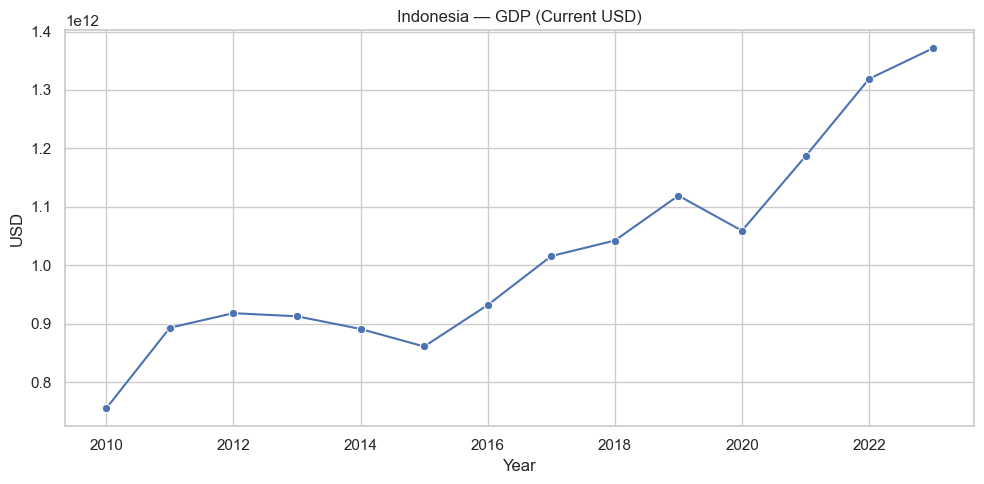

In [5]:
# GDP (Current USD)
safe_lineplot(
    indo[["year","GDP (Current USD)"]].dropna(),
    x="year", y="GDP (Current USD)",
    title="Indonesia — GDP (Current USD)", ylabel="USD"
)

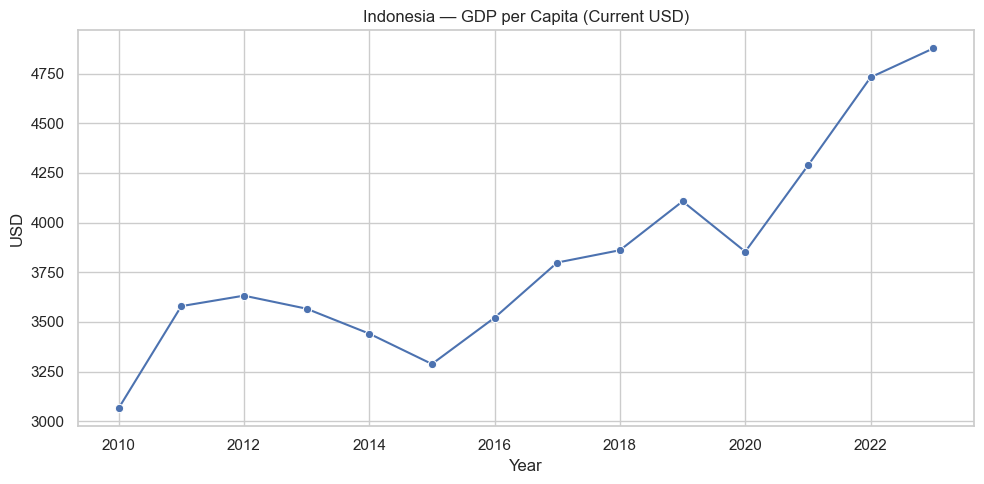

In [6]:
# GDP per Capita
safe_lineplot(
    indo[["year","GDP per Capita (Current USD)"]].dropna(),
    x="year", y="GDP per Capita (Current USD)",
    title="Indonesia — GDP per Capita (Current USD)", ylabel="USD"
)

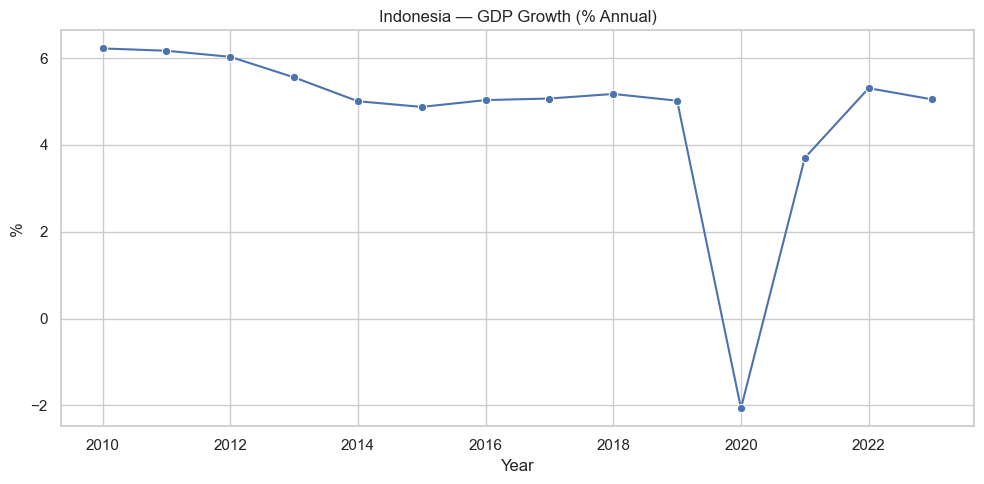

In [7]:
# GDP Growth (% Annual)
safe_lineplot(
    indo[["year","GDP Growth (% Annual)"]].dropna(),
    x="year", y="GDP Growth (% Annual)",
    title="Indonesia — GDP Growth (% Annual)", ylabel="%"
)

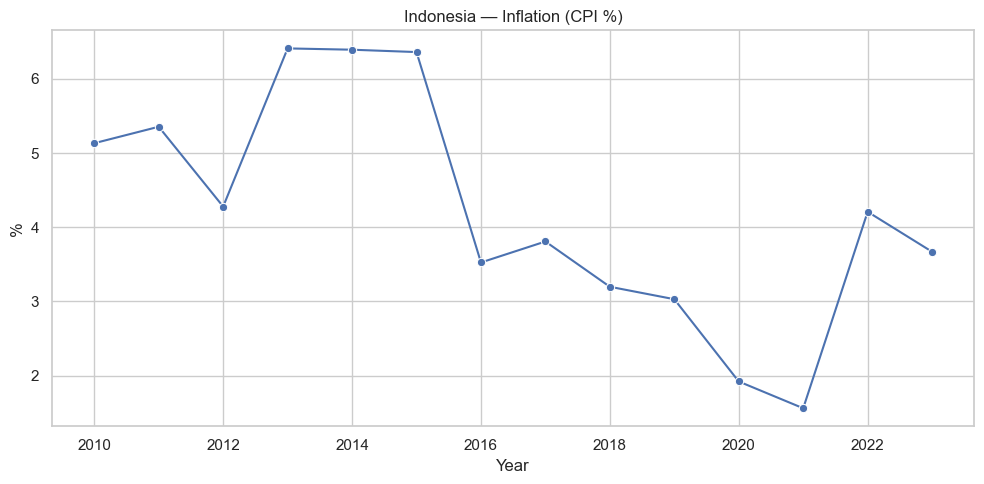

In [8]:
# Inflation (CPI %)
safe_lineplot(
    indo[["year","Inflation (CPI %)"]].dropna(),
    x="year", y="Inflation (CPI %)",
    title="Indonesia — Inflation (CPI %)", ylabel="%"
)

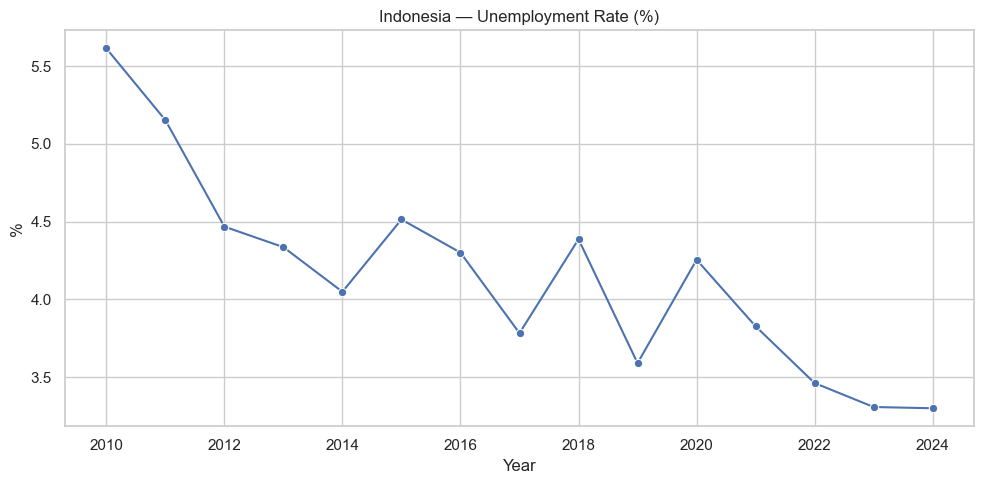

In [9]:
# Unemployment Rate (%)
safe_lineplot(
    indo[["year","Unemployment Rate (%)"]].dropna(),
    x="year", y="Unemployment Rate (%)",
    title="Indonesia — Unemployment Rate (%)", ylabel="%"
)

6. Event Highlight: 2020 Pandemic Shock

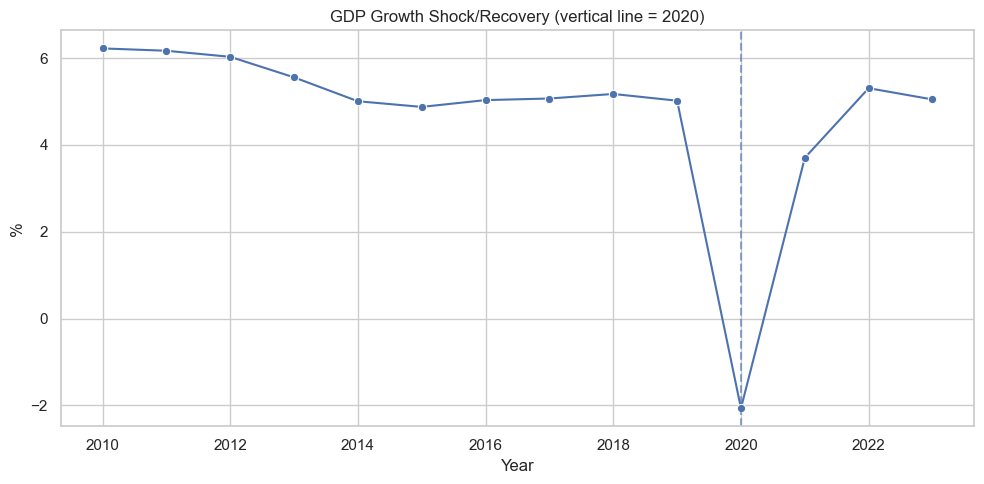

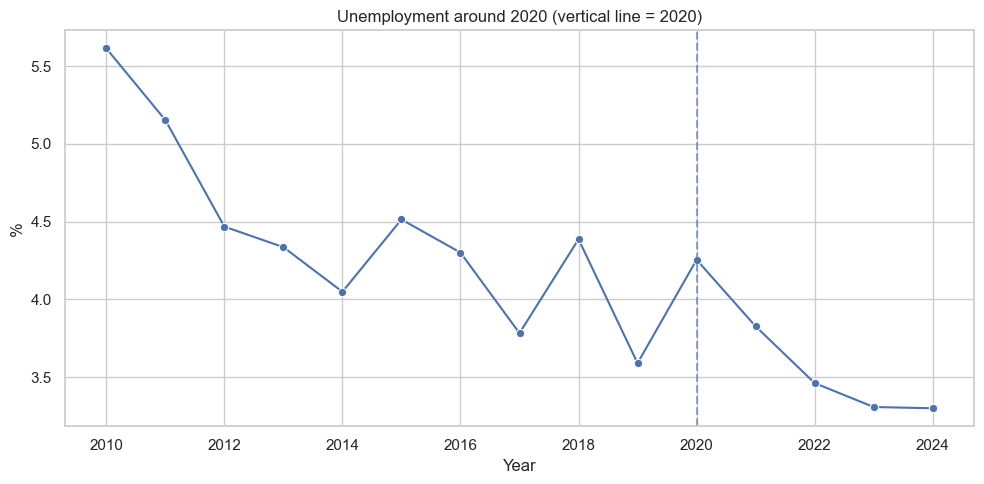

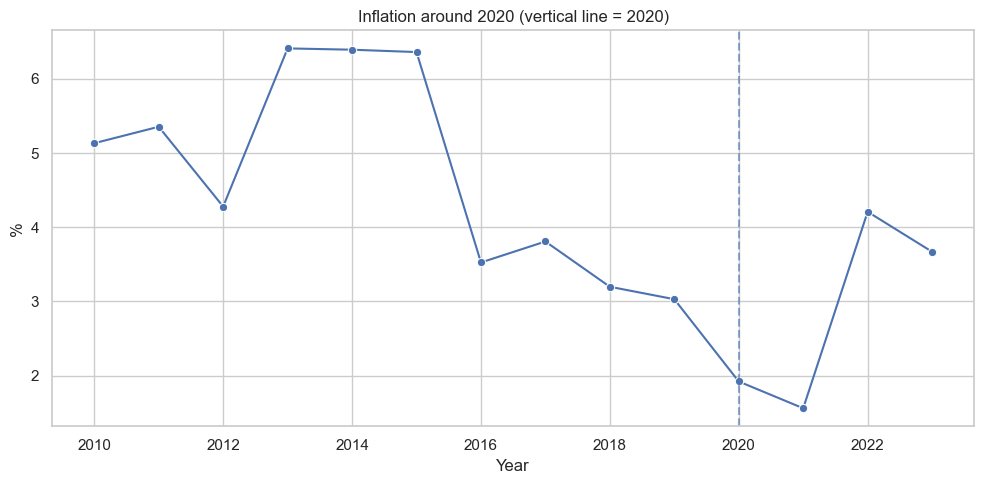

In [10]:
# Helper to add vertical line at 2020
def vline_2020(ax=None):
    ax = ax or plt.gca()
    ax.axvline(2020, ls="--", alpha=0.6)

def plot_with_event(df_, col, title, ylabel):
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df_.dropna(subset=[col]), x="year", y=col, marker="o")
    vline_2020()
    plt.title(title + " (vertical line = 2020)")
    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

plot_with_event(indo, "GDP Growth (% Annual)", "GDP Growth Shock/Recovery", "%")
plot_with_event(indo, "Unemployment Rate (%)", "Unemployment around 2020", "%")
plot_with_event(indo, "Inflation (CPI %)", "Inflation around 2020", "%")

# Key Insights (so far) – Indonesia

- GDP & GDP per Capita:
Indonesia’s GDP shows steady long-term growth, reaching over 1.3 trillion USD in 2023, while GDP per capita is around 4,800 USD. This reflects a growing economy but still places Indonesia in the middle-income category globally.
- GDP Growth:
Growth remained stable at ~5–6% before 2020, but dropped sharply to –2% in 2020 due to the COVID-19 pandemic. Recovery was quick, with growth rebounding above 5% by 2022, indicating resilience.
- Inflation:
Inflation was relatively moderate (3–6%) for most of the period. It dipped below 2% around 2020 but spiked again in 2022, showing sensitivity to external shocks (pandemic, global supply chain, energy prices).
- Unemployment:
The unemployment rate trended downward from 5.5% in 2010 to around 3.3% in 2024, suggesting gradual labor market improvements despite the temporary rise during COVID-19.
- Fiscal Data:
Government revenue and expenditure (% of GDP) have very limited data availability (only 16 records), making it hard to evaluate fiscal balance trends.
Public debt (% of GDP) data is missing, preventing direct analysis of debt sustainability.

# Conclusion – Indonesia Deep Dive

- Indonesia’s economy shows resilient growth with recovery after the 2020 COVID shock, supported by consistent GDP expansion and stable inflation.
- Structural challenges remain: GDP per capita is still modest compared to developed countries, indicating room for productivity and income growth.
- Labor market improvements are notable, with unemployment falling steadily, but job quality and informality may still be key issues behind the numbers.
- Data gaps (especially in fiscal and debt indicators) limit the full picture of Indonesia’s macroeconomic health — better transparency and availability are crucial for analysis.
- Overall, Indonesia stands as a stable, growing emerging economy, but long-term sustainability will depend on productivity gains, effective fiscal management, and resilience to global economic shocks.